In [23]:
import osmnx as ox
import matplotlib.pyplot as plt
from collections import defaultdict
import heapq

#pacchetto contenente algoritmo di Dijkstra
import networkx as nx
%matplotlib inline

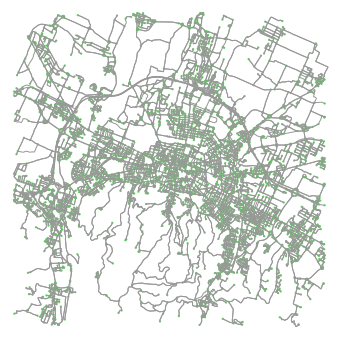

In [44]:
location_point = (44.4952162, 11.3366744)

#ci sono più modi per scaricare una mappa, qui ho usato un punto (con coordinare geografiche) e un raggio ( chiamato distance) 
G = ox.graph_from_point(location_point, distance=7000, distance_type='bbox', network_type='drive')

#plotta la mappa
fig, ax = ox.plot_graph(G, node_size=5, node_color='#66cc66')

In [45]:
nodes, edges = ox.graph_to_gdfs(G)

In [46]:
lista_nodi = nodes['osmid'].tolist()
tail = edges['u'].tolist()
head = edges['v'].tolist()
weight = edges['length'].tolist()
my_edges = []
distance = {}
padre = {}

In [47]:
for i in range(len(tail)):
    my_edges.append([tail[i],head[i],weight[i]])


In [48]:
# ho utilizzato un dizionario come una lista di adiacienza:
# { nodo i :  [(nodo_j, costo_ij), (nodo_z, costo_iz),  ...]

# ...

# }

graph = defaultdict(list)

for t, h, w in my_edges:
    graph[t].append((h, w))
    


In [49]:
for i in lista_nodi:
    distance[i] = 999999
    padre[i] = None


In [42]:
def dijkstra(graph, source, target):
    distance[source] = 0
    # q è la mia heap del tipo q = [(distanza_1, nodo_1), (distanza_2, nodo_2), ....]
    q = [(0, source)]
    visited = []
    
    while target not in visited:
        
        #metodo che mi restituisce dalla heap la coppia (distanza, nodo) con distanza minore
        curr_dist, curr_node = heapq.heappop(q)
        if curr_node not in visited:
            visited.append(curr_node)
            for neighbor, cost in graph[curr_node]:
                if neighbor not in visited:
                    if curr_dist + cost < distance[neighbor]:
                        distance[neighbor]= curr_dist + cost
                        padre[neighbor]= curr_node
                        heapq.heappush(q, (distance[neighbor], neighbor))
    
    parent = [target]
    num = 0
    while source not in parent:
        parent.append(padre[parent[num]])
        num = num + 1
    result = parent[::-1]
    print(result)
    fig, ax = ox.plot_graph_route(G, result)


[1749439566, 2095983808, 2095983815, 268236438, 2095983863, 291742772, 252059739, 3323458381, 252059372, 252059115, 2576898127, 3776267316, 244223277, 523064642, 2576874411, 2576874421, 251901276, 2619920317, 251901939, 251901940, 244223275, 1630441197, 251901937, 2390874376, 252107009, 252105399, 252105396, 252107006, 287560635, 1247737549, 5151416381, 4456257269, 252106003, 252105807, 2842807441, 3368589745, 399808254, 399808749, 399807541, 3380933636, 250734913, 250734916, 387531630, 250734919, 400900264, 1645734452, 1645734465, 1645734475, 1645734477, 1645734495, 1645734515, 250734921, 1646701935, 250763483, 251885681, 251891683, 250734925, 250763454, 1219012774, 1219012770, 402601423, 250715915, 250762010, 3292011304, 3292011306, 250761907, 250761922, 250761957, 250761958, 482623607, 352457076, 440707757, 352457089, 250761941, 428235099, 258078282, 1617804339, 1358296254, 513924627, 292608593, 1637028790, 513924550, 513924565, 513924568, 1637028783, 292608552, 272882229, 272882234

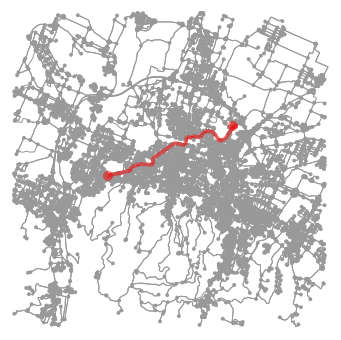

In [50]:
dijkstra(graph, 1749439566, 368329350)